# Naive Bayes:

# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

# Data Exploration and Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df=pd.read_csv('blogs.csv')

In [4]:
df.shape

(2000, 2)

In [5]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Preprocessing Data:

In [10]:
# Data cleaning function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

In [11]:
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [12]:
df['Cleaned_Data'].head()

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism53485 tal...
Name: Cleaned_Data, dtype: object

In [13]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
#features
X = tfidf.fit_transform(df['Cleaned_Data'])
#target
y = df['Labels']

# Naive Bayes Model for Text Classification:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
nb = MultinomialNB()

In [16]:
nb.fit(X_train, y_train)

MultinomialNB()

In [17]:
y_pred = nb.predict(X_test)

In [18]:
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'talk.politics.misc', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.hockey', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'soc.religion.christian',

# Sentiment Analysis:

In [19]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 186.2 kB/s eta 0:00:04
   --- ----------------------------------- 61.4/626.3 kB 297.7 kB/s eta 0:00:02
   ---------- --------------------------- 174.1/626.3 kB 697.2 kB/s eta 0:00:01
   ----------------- -------------------- 286.7/626.3 kB 983.9 kB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.6 MB/s eta 0:00:00


In [20]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [21]:
# Analyzing sentiment distribution across different categories
sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'])
print(sentiment_by_category)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                     12       28        60
comp.graphics                   15       25        60
comp.os.ms-windows.misc         17       19        64
comp.sys.ibm.pc.hardware        12       27        61
comp.sys.mac.hardware           12       24        64
comp.windows.x                  17       27        56
misc.forsale                    13       21        66
rec.autos                       11       20        69
rec.motorcycles                 14       24        62
rec.sport.baseball              17       27        56
rec.sport.hockey                20       28        52
sci.crypt                        8       32        60
sci.electronics                  7       39        54
sci.med                         19       28        53
sci.space                       13       22        65
soc.religion.christian           9       33        58
talk.politics.guns          

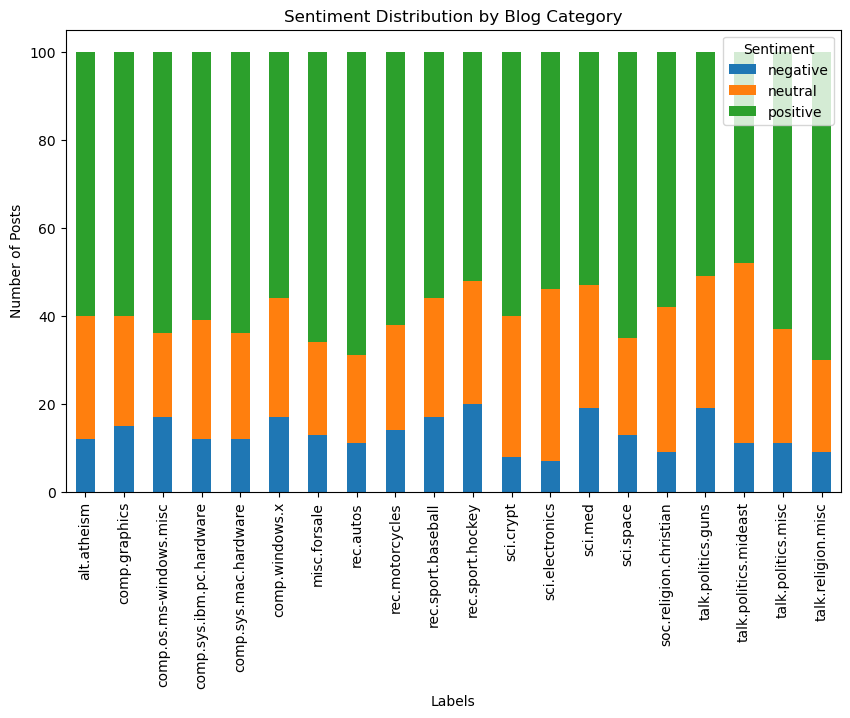

In [22]:
# Visualization of sentiment distribution per category
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution by Blog Category')
plt.ylabel('Number of Posts')
plt.show()

# Evaluation:

In [23]:
#model performance
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.82
Precision: 0.844747244324381
Recall: 0.82
F1 Score: 0.8144501134827706


In [24]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88     

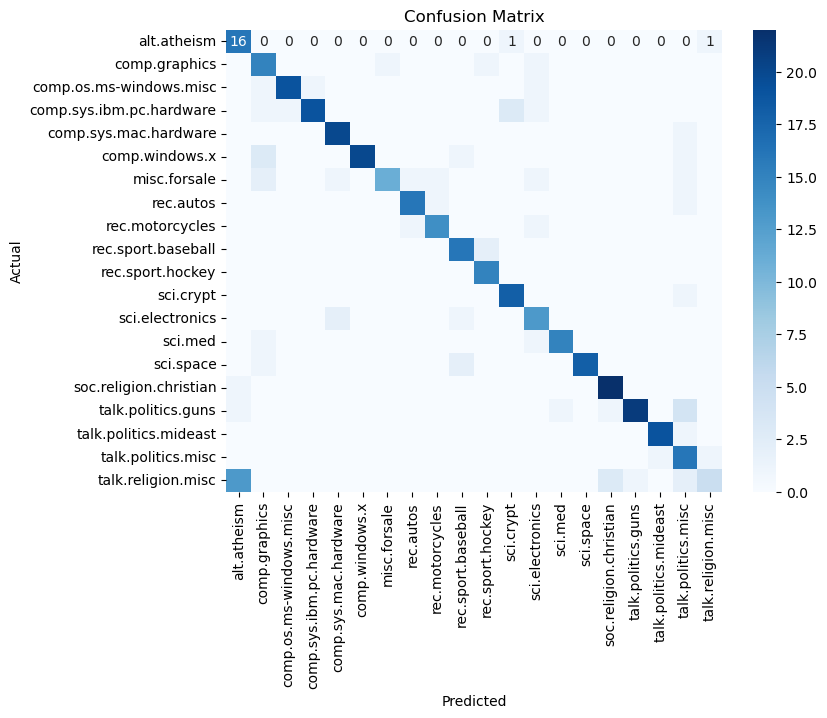

In [25]:
# Confusion matrix between testing set and predictions.
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Summary:

# Insights:

# Performance of the model and challenges encountered during the classification process.

# Challenges:

# Reflection on Sentiment Analysis Results and their implications regarding the content of the blog posts.

# Implications Regarding Blog Content: